# NOMES:
* Bruno Gomes Coelho  - 9791160
* Bruno Mendes da Costa - 9779433

# Aprendizado de Máquina
# Aula 02 - Exercício 01

## Dados unidimensionais
 
Suponha dois conjuntos de dados, que representam as notas finais em uma dada disciplina de duas salas com 100 alunos. Os dados foram armazenados nos arquivos "notas_salas01.txt" e "notas_salas02.txt". 

Imagine que uma pessoa deseje comparar o desempenho das salas de aula. Considera-se que, **quanto mais alunos foram aprovados, melhor o desempenho da sala**. Suponha que para ser aprovado, um aluno deve ter nota maior que 50. 

Como medida inicial de desempenho, essa pessoa calculou a média dos dados através do código abaixo:

In [0]:
# Atualizando seaborn para a mais nova versão
!pip3 install -qU seaborn

In [0]:
# Lendo os dados 
!wget "https://www.dropbox.com/s/58wpec9s6up7p3x/notas_sala01.txt?dl=1" -qO notas_sala01.txt
!wget "https://www.dropbox.com/s/7tte09scim1qab2/notas_sala02.txt?dl=1" -qO notas_sala02.txt
!wget "https://www.dropbox.com/s/02gs43xfm9jmxtg/iris.data?dl=1" -qO iris.data

In [0]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew, kurtosis

In [0]:



salas = []
salas.append(np.loadtxt("notas_sala01.txt"))
salas.append(np.loadtxt("notas_sala02.txt"))

n_sala = 1
for sala in salas:
    print("--- Sala: %d ---" % n_sala)
    print("Média: %f" % np.mean(sala))    
    n_sala += 1
n_sala = 0

--- Sala: 1 ---
Média: 60.184709
--- Sala: 2 ---
Média: 55.184195


Dessa forma, a pessoa concluiu que a sala 1 obteve um melhor desempenho que a sala 2. 

- Demonstre o porquê dessa conclusão estar equivocada.

  - Dica: Transforme as estruturas `salas[0]` e `salas[1]` em estruturas do tipo `DataFrame` da biblioteca **pandas** e utilize as funções de histograma e/ou boxplot.

In [0]:
salas_1 = pd.DataFrame(salas[0], columns=["notas"])
salas_1.head()

salas_2 = pd.DataFrame(salas[1], columns=["notas"])
salas_2.head()



,notas
0,58.064151
1,57.432729
2,62.847655
3,60.350696
4,63.985701


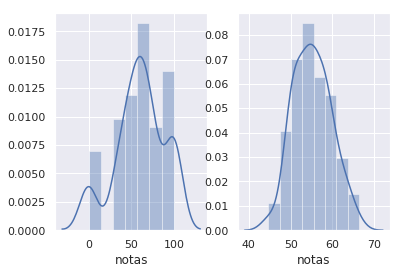

In [0]:
fig, ax = plt.subplots(1,2)

sns.distplot(salas_1["notas"], ax=ax[0])
sns.distplot(salas_2["notas"], ax=ax[1])


Como pode ser observado pelos histogramas acima, a sala 1 tem uma quantidade grande de alunos com nota próxima de 100, fazendo com que a média seja elevada, mas sem possuir mais alunos aprovados.

Isso pode ser comprovado pela contagem de alunos aprovados abaixo:



---

Calcule o número de aprovados em cada uma das salas.
- Dica: Use a função `argwhere` da biblioteca **numpy**.

In [0]:
print("Sala 1, aprovados:", sum(salas_1["notas"] >= 50))
print("Sala 2, aprovados:", sum(salas_2["notas"] >= 50))

# len(np.argwhere(salas_1["notas"] >= 50))
# len(np.argwhere(salas_2["notas"] >= 50))

Sala 1, aprovados: 68
Sala 2, aprovados: 90


## Dados multidimensionais

Considere o conjunto Iris, disponível no arquivo `iris.data`.  Ele contém 150 observações sobre 4 características medidas em 3 tipos de flores. 

O trecho de código abaixo carrega o conjunto, armazena-o na variável `iris` e exibe seu conteúdo.



In [0]:


iris = pd.read_csv("iris.data", header=None, 
                   names=["sepal_length", "sepal_width", 
                                         "petal_length", "petal_width", "class"])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa




---


- Calcule os quatro momentos (média, variância, obliquidade e achatamento) de cada uma das quatro variáveis do conjunto.

  - Dica:  cada variável pode ser acessada da forma `iris[i]`, onde `i` é uma das 4 variáveis do conjunto (entre 0 e 3). Utilize as bibliotecas **numpy** para média (mean) e variância (variance) e **Scipy** para obliquidade (skew) e achatamento (kurtosis).

In [0]:
for col in iris.columns[:-1]:
    print(f"Variável: {col}")
    for func, name in [(np.mean, "mean"), (np.var, "variance"),
                       (skew, "skew"), (kurtosis, "kurtosis")]:
        print(f"\t Função {name}:", func(iris.loc[:, col])) 
    print()

Variável: sepal_length
	 Função mean: 5.843333333333335
	 Função variance: 0.6811222222222222
	 Função skew: 0.3117530585022963
	 Função kurtosis: -0.5735679489249765

Variável: sepal_width
	 Função mean: 3.0540000000000007
	 Função variance: 0.1867506666666667
	 Função skew: 0.330702812773315
	 Função kurtosis: 0.24144329938318343

Variável: petal_length
	 Função mean: 3.7586666666666693
	 Função variance: 3.0924248888888854
	 Função skew: -0.2717119501716388
	 Função kurtosis: -1.3953593021397128

Variável: petal_width
	 Função mean: 1.1986666666666672
	 Função variance: 0.5785315555555559
	 Função skew: -0.10394366626751729
	 Função kurtosis: -1.3352456441311857





---


- Calcule o histograma e o boxplot de cada uma das quatro variáveis do conjunto. Analise se os dados estão centrados (simetria) e estime qual intervalo contém 50% dos dados (intervalo entre primeiro e terceiro quartil).


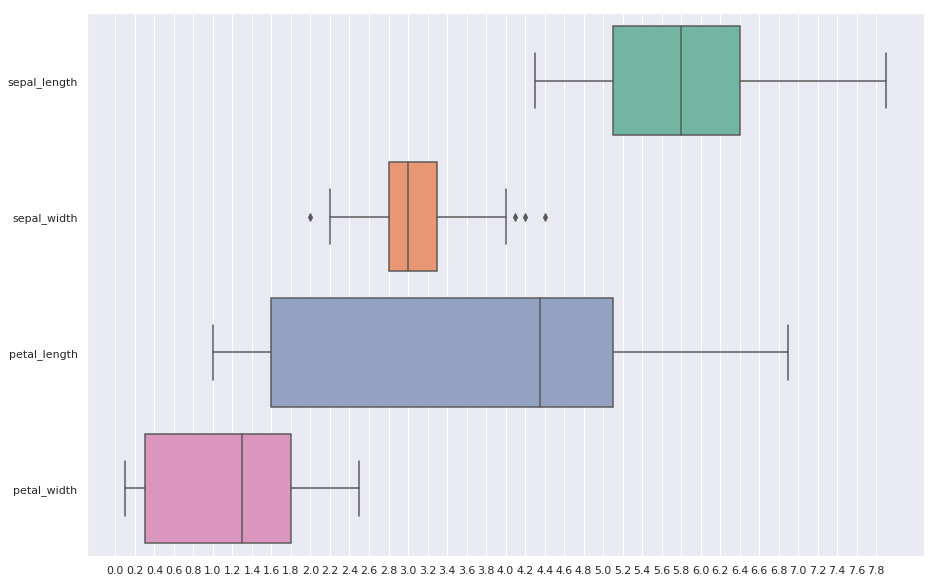

In [0]:
plt.figure(figsize=(15, 10))
plt.xticks(ticks=[0.2*x for x in range(10*4)])
sns.boxplot(data=iris, orient="h", palette="Set2")


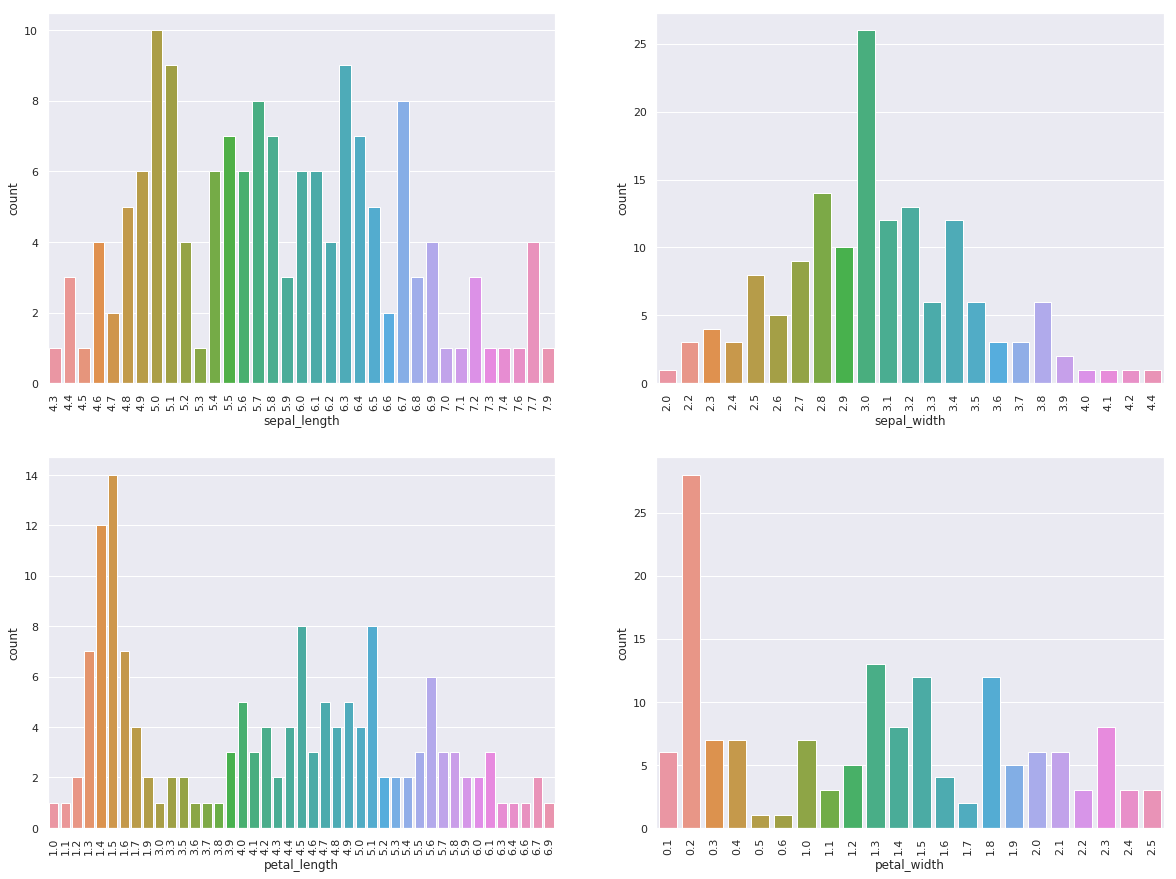

In [0]:
fig, ax = plt.subplots(2,2, figsize=(20, 15))
sns.countplot(iris['sepal_length'], ax=ax[0][0])
sns.countplot(iris['sepal_width'], ax=ax[0][1])
sns.countplot(iris['petal_length'], ax=ax[1][0])
sns.countplot(iris['petal_width'], ax=ax[1][1])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

Conforme podemos ver pelos histogramas, parece que apenas a feature "sepal_width" (feature 1 originalmente) é simétrica.

Conforme podemos ver pelos boxplots, temos aproximadamente os seguintes intervalos para 50% dos dados:



0.  Entre 5.1 e 6.4
1.  Entre 2.8 e 3.3
2.  Entre 1.6 e 5.1
3.  Entre 0.3 e 1.8 





---


- Calcule o gráfico de dispersão entre todas as variáveis do conjunto para indicar uma possível relação entre as variáveis.
  - Dica: utilize a função `pairplot` da biblioteca **seaborn**

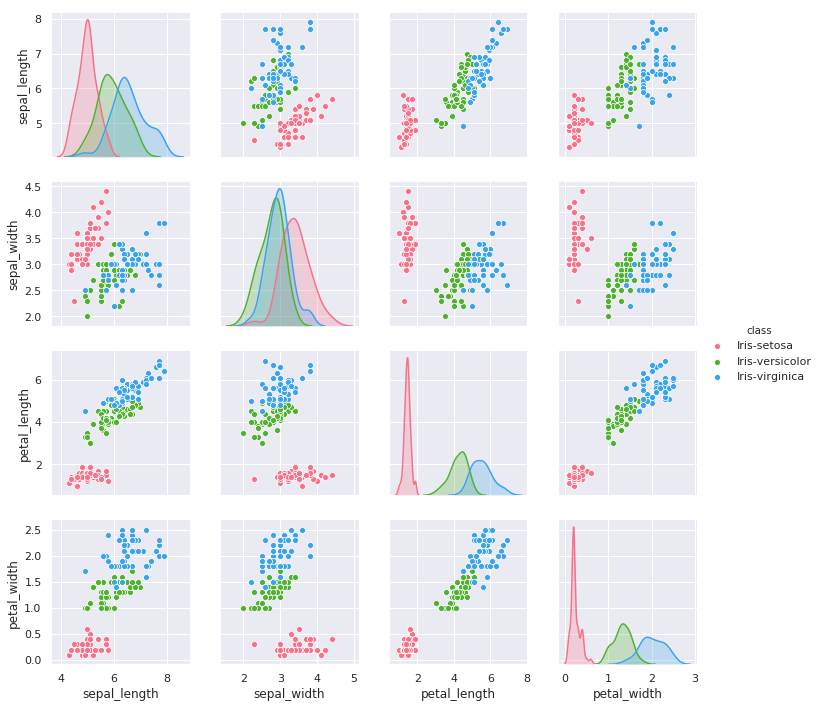

In [0]:
sns.pairplot(iris, hue="class", palette="husl", diag_kind="kde")



---

- Para obter um valor numérico sobre a relação entre as variáveis, calcule a matriz de covariância dos dados. Comente quais variáveis estão mais relacionadas e se há alguma relação com o gráfico gerado na questão anterior.
  - Dica: utilize a biblioteca a função `cov` da biblioteca **numpy**, com parâmetro `rowvar=False`.

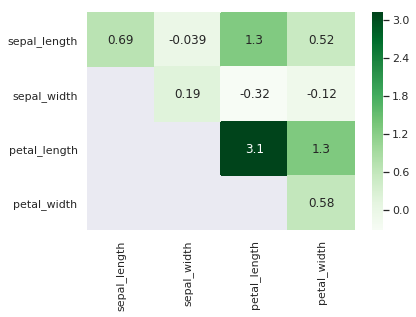

In [0]:
cor_matrix = np.cov(iris.drop(columns=["class"]), rowvar=False)

mask = np.zeros_like(cor_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#mask

sns.heatmap(cor_matrix, mask=~mask, cmap="Greens", annot=True, xticklabels=iris.columns[:-1], yticklabels=iris.columns[:-1])

Conforme podemos ver pelo heatmap da covariância, pode-se observar que:

 - sepal_length está correlacionada postivamente com  petal_lentgth;
 - petal_length está correlacionada postivamente com  petal_width;
 
 Estas informações também são embasadas pelos gráficos de dispersão de pontos, onde pose se perceber uma tendência linear desses pares de features.



---

A magnitude da covariância não é um valor facilmente interpretável, pois não é um valor normalizado e portanto depende da magnitude das variáveis que foram usadas para seu cálculo. Dessa forma podemos utilizar o Coeficiente de correlação de Pearson para facilitar nossa análise.

- Calcule o coeficiente de correlação de Pearson para as variáveis do conjunto.
  - Dica: utilize a função `corrcoef` da biblioteca **numpy** com parâmetro `rowvar=False`.

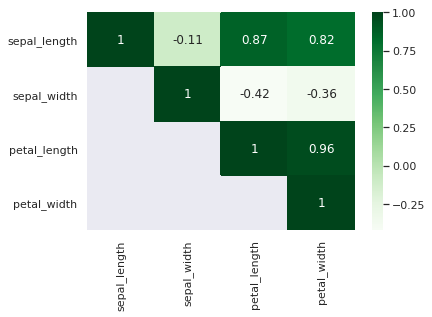

In [0]:
cor_matrix = np.corrcoef(iris.drop(columns=["class"]), rowvar=False)

mask = np.zeros_like(cor_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#mask

sns.heatmap(cor_matrix, mask=~mask, cmap="Greens", annot=True, xticklabels=iris.columns[:-1], yticklabels=iris.columns[:-1])

Podemos ver que o resultado deste heatmap também corrobora com o resultado obtido com a matriz de covariânca, porêm a partir deste ficou mais claro que também há uma relação entre sepal_lenght e petal_width, que também pode ser observado pelo gráfico de dispersão de pontos.